In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import joblib



In [2]:
df_test = pd.read_csv('test.csv')

In [3]:
df_train = pd.read_csv('train.csv')

In [4]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
missing_values = df_train.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


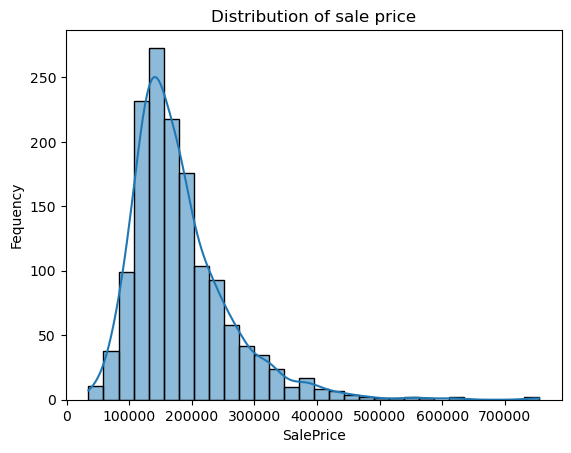

In [7]:
#Distrubution of sale prices
sns.histplot(df_train['SalePrice'], bins=30, kde=True)#kernal density estimation
plt.title('Distribution of sale price')
plt.xlabel('SalePrice')
plt.ylabel('Fequency')
plt.show()

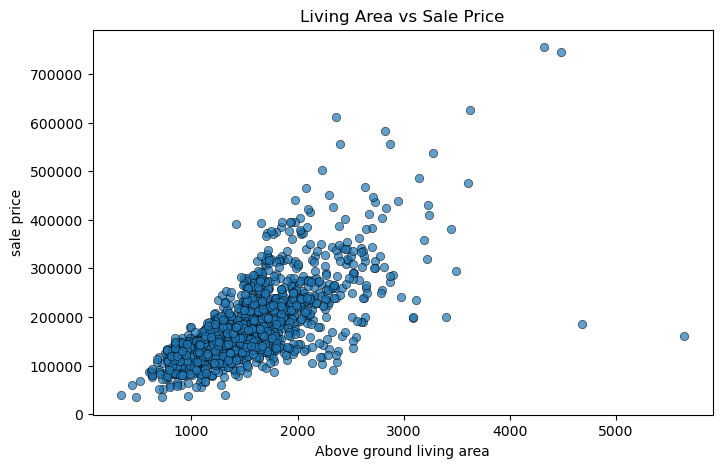

In [8]:
#living Area vs sale price
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_train['GrLivArea'], y=df_train['SalePrice'],alpha=0.7, edgecolor="black")
plt.title('Living Area vs Sale Price')
plt.xlabel('Above ground living area')
plt.ylabel('sale price')
plt.show()

In [9]:
Select_Features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'Neighborhood', 
                   'GarageCars', 'BsmtQual', 'KitchenQual', 'FullBath', 'LotArea']
df_train = df_train[Select_Features + ['SalePrice']]
df_test = df_test[Select_Features]

In [10]:
#ordinal in coding
ordinal_mapping = {'Ex':5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, np.nan:0}
df_train['BsmtQual'] = df_train['BsmtQual'].map(ordinal_mapping).fillna(0)
df_train['KitchenQual'] = df_train['KitchenQual'].map(ordinal_mapping).fillna(0)
df_test['BsmtQual'] = df_test['BsmtQual'].map(ordinal_mapping).fillna(0)
df_test['KitchenQual'] = df_test['KitchenQual'].map(ordinal_mapping).fillna(0)

imputer = SimpleImputer(strategy='median')
df_train[['TotalBsmtSF','GarageCars', 'LotArea']] = imputer.fit_transform(df_train[['TotalBsmtSF', 'GarageCars', 'LotArea']])
df_test[['TotalBsmtSF','GarageCars', 'LotArea']] = imputer.fit_transform(df_test[['TotalBsmtSF', 'GarageCars', 'LotArea']])

C:\Users\Alam Zaib Hussain\AppData\Local\Temp\ipykernel_4404\3590899657.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['BsmtQual'] = df_train['BsmtQual'].map(ordinal_mapping).fillna(0)
C:\Users\Alam Zaib Hussain\AppData\Local\Temp\ipykernel_4404\3590899657.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['KitchenQual'] = df_train['KitchenQual'].map(ordinal_mapping).fillna(0)
C:\Users\Alam Zaib Hussain\AppData\Local\Temp\ipykernel_4404\3590899657.py:9: SettingWithCopyWarning: 
A val

In [11]:
df_train

,OverallQual,GrLivArea,TotalBsmtSF,YearBuilt,Neighborhood,GarageCars,BsmtQual,KitchenQual,FullBath,LotArea,SalePrice
0,7,1710,856.0,2003,CollgCr,2.0,4,4,2,8450.0,208500
1,6,1262,1262.0,1976,Veenker,2.0,4,3,2,9600.0,181500
2,7,1786,920.0,2001,CollgCr,2.0,4,4,2,11250.0,223500
3,7,1717,756.0,1915,Crawfor,3.0,3,4,1,9550.0,140000
4,8,2198,1145.0,2000,NoRidge,3.0,4,4,2,14260.0,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,953.0,1999,Gilbert,2.0,4,3,2,7917.0,175000
1456,6,2073,1542.0,1978,NWAmes,2.0,4,3,2,13175.0,210000
1457,7,2340,1152.0,1941,Crawfor,1.0,3,4,2,9042.0,266500
1458,5,1078,1078.0,1950,NAmes,1.0,3,4,1,9717.0,142125


In [12]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_neoghborhood = pd.DataFrame(encoder.fit_transform(df_train[['Neighborhood']]).toarray(),
                                    columns=encoder.get_feature_names_out())
df_train = df_train.drop(columns=['Neighborhood']).join(encoded_neoghborhood)

encoded_neoghborhood_test = pd.DataFrame(encoder.transform(df_test[['Neighborhood']]).toarray(),
                                         columns=encoder.get_feature_names_out())
df_test = df_test.drop(columns=['Neighborhood']).join(encoded_neoghborhood_test)

#Save encoder for future use in app.py
with open("neighborhood_encoder.pjl", "wb") as f:
    joblib.dump(encoder, f)

In [13]:
df_train.head()

,OverallQual,GrLivArea,TotalBsmtSF,YearBuilt,GarageCars,BsmtQual,KitchenQual,FullBath,LotArea,SalePrice,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,7,1710,856.0,2003,2.0,4,4,2,8450.0,208500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,1262,1262.0,1976,2.0,4,3,2,9600.0,181500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7,1786,920.0,2001,2.0,4,4,2,11250.0,223500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,1717,756.0,1915,3.0,3,4,1,9550.0,140000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,2198,1145.0,2000,3.0,4,4,2,14260.0,250000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df_train['LotArea'] = np.log1p(df_train['LotArea'])
df_train['GrLivArea'] = np.log1p(df_train['GrLivArea'])
df_train['TotalBsmtSF'] = np.log1p(df_train['TotalBsmtSF'])
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

df_test['LotArea'] = np.log1p(df_test['LotArea'])
df_test['GrLivArea'] = np.log1p(df_test['GrLivArea'])
df_test['TotalBsmtSF'] = np.log1p(df_test['TotalBsmtSF'])

In [15]:
df_train

,OverallQual,GrLivArea,TotalBsmtSF,YearBuilt,GarageCars,BsmtQual,KitchenQual,FullBath,LotArea,SalePrice,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,7,7.444833,6.753438,2003,2.0,4,4,2,9.042040,12.247699,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,7.141245,7.141245,1976,2.0,4,3,2,9.169623,12.109016,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7,7.488294,6.825460,2001,2.0,4,4,2,9.328212,12.317171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,7.448916,6.629363,1915,3.0,3,4,1,9.164401,11.849405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,7.695758,7.044033,2000,3.0,4,4,2,9.565284,12.429220,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,7.407318,6.860664,1999,2.0,4,3,2,8.976894,12.072547,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,6,7.637234,7.341484,1978,2.0,4,3,2,9.486152,12.254868,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,7,7.758333,7.050123,1941,1.0,3,4,2,9.109746,12.493133,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,5,6.983790,6.983790,1950,1.0,3,4,1,9.181735,11.864469,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Model Selection and Training

In [16]:
#splitting Dataset
X = df_train.drop(columns=['SalePrice'])
y = df_train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
print('Linear Regression MSE:' , mean_squared_error(y_test, lr_preds))

Linear Regression MSE: 0.023366035823265817


In [18]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
print('Random Forest MSE:', mean_squared_error(y_test, rf_preds))

Random Forest MSE: 0.02510383327553711


XGBoost

In [19]:
xgb = XGBRegressor(n_estimators= 100, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)
print('XGBoost  MSE:', mean_squared_error(y_test, xgb_preds))

XGBoost  MSE: 0.028030690290087205


Save  the model

In [20]:
best_model = lr
joblib.dump(best_model, 'house_price_model.pkl')

['house_price_model.pkl']